使用鸢尾花数据集绘制散点图

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [7]:
iris = sns.load_dataset("iris")


print(iris.dtypes)
print(iris.head())

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


sepal_length (萼片长度)：这是指鸢尾花萼片的长度，单位通常是厘米。萼片是花朵最外层的部分，通常呈绿色，在花朵未开放时保护花蕾。

sepal_width (萼片宽度)：这是指鸢尾花萼片的宽度，同样以厘米为单位。它与萼片长度一起提供了关于萼片大小的信息。

petal_length (花瓣长度)：这是指鸢尾花花瓣的长度。花瓣位于萼片内部，通常色彩鲜艳，吸引传粉者。

petal_width (花瓣宽度)：这是指鸢尾花花瓣的宽度。花瓣的尺寸对于区分不同种类的鸢尾花特别有用。

species (物种)：这是一个分类变量，表示鸢尾花的具体种类。在标准的鸢尾花数据集中，有三种不同的鸢尾花种类：
setosa
versicolor
virginica

绘制关联图

In [ ]:
sns.relplot(
    data=None,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    row=None,
    col=None,
    col_wrap=None,
    row_order=None,
    col_order=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=None,
    dashes=None,
    style_order=None,
    legend="auto",
    kind="scatter",
    height=5,
    aspect=1,
    facet_kws=None,
    **kwargs,
)

绘制萼片长度与花瓣长度之间的散点图，同时用不同的颜色表示不同的鸢尾花种类。

In [ ]:
sns.scatterplot(
    data=None,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    markers=True,
    style_order=None,
    legend="auto",
    ax=None,
    **kwargs,
)

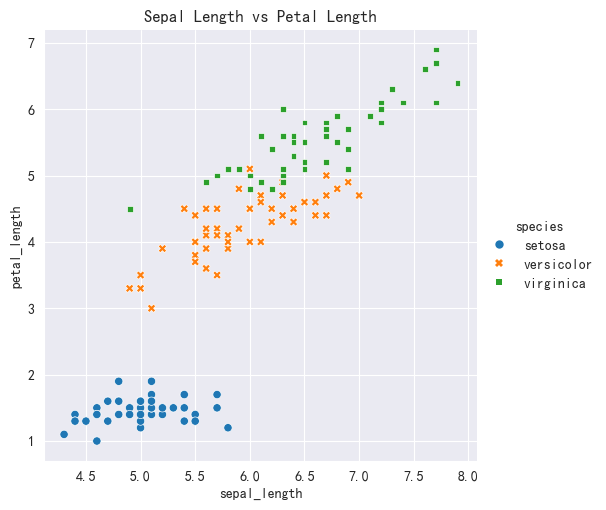

In [16]:
sns.relplot(data=iris, x='sepal_length', y='petal_length', hue='species', style="species")


plt.title("Sepal Length vs Petal Length")
plt.show()

sns 绘图时，不同类别数据显示的颜色会不一致，如何调整不同列的颜色呢？



In [ ]:
# Seaborn 提供了多种内置的颜色调色板（palettes），你可以直接在绘图函数中通过 palette 参数指定一个调色板。
import seaborn as sns
import matplotlib.pyplot as plt

# 示例数据集
tips = sns.load_dataset("tips")

# 使用自定义的调色板
sns.catplot(x="day", y="total_bill", hue="smoker", kind="bar",
            data=tips, palette={"Yes": "red", "No": "green"})
plt.show()

kind 默认情况下就是 scatter, 可以看到上下两个图一模一样

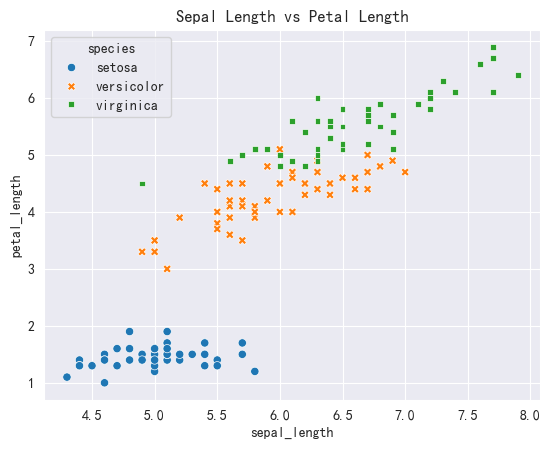

In [10]:

sns.scatterplot(data=iris, x='sepal_length', y='petal_length', hue='species', style="species")


plt.title("Sepal Length vs Petal Length")
plt.show()


在上面的图中可以看到，同样的 sepal length 会存在多个不同的 petal length

如果我们要展示 sepal length 与 petal length 的关系，但是又不希望 sepal length 与 petal length 之间的关系被 species 所干扰，我们可以使用 kind="line" 来展示，

此时就是一个 x 对应了多个 y, y 值会如何聚合呢？

默认聚合方式：
- 统计量（Estimator）：mean（均值）
- 误差条（Error bar）：95% confidence interval（置信区间），基于 bootstrap 方法计算

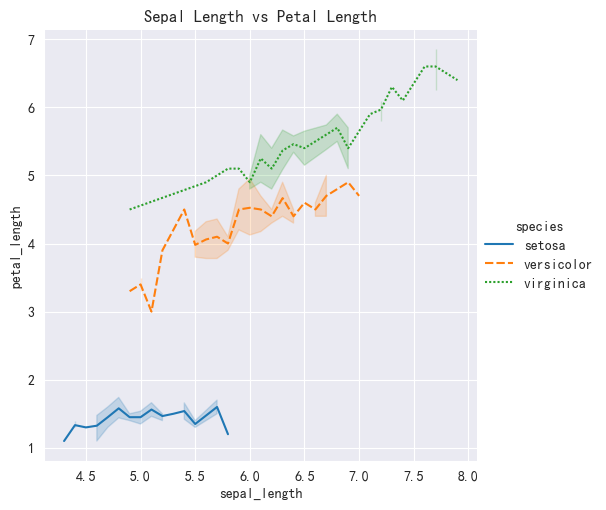

In [17]:
sns.relplot(data=iris, x='sepal_length', y='petal_length', hue='species', style="species", kind="line")

plt.title("Sepal Length vs Petal Length")
plt.show()


如上图所示，在一个 x 对应多个 y 的位置，就会出现误差条，95% confidence interval（置信区间），基于 bootstrap 方法计算，置信区间的高度就是误差条的高度。


折线图主要用于观察趋势，因此在鸢尾花数据集中其实不太适用，但是可以使用其他数据作为展示。

比如展示某公司某产品各年的销售额。

In [11]:
import pandas as pd

# 多产品数据
data_multi = pd.DataFrame({
    'Year': [2018, 2019, 2020, 2021, 2022, 2023] * 2,
    'Product': ['A'] * 6 + ['B'] * 6,
    'Sales': [120, 135, 140, 160, 180, 200, 100, 110, 130, 145, 150, 160]
})

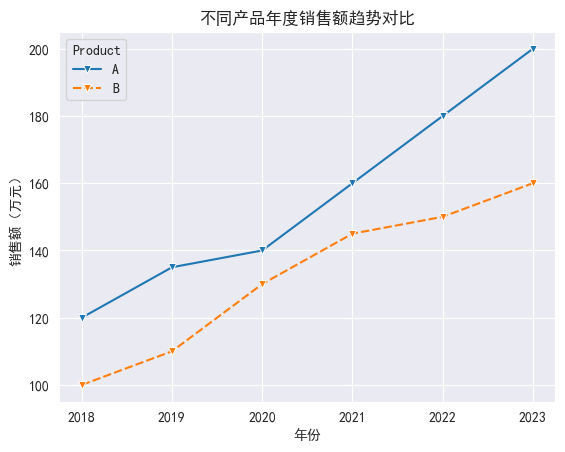

In [12]:


sns.lineplot(data=data_multi, x='Year', y='Sales', hue='Product', marker='v', style='Product')

plt.title('不同产品年度销售额趋势对比')
plt.xlabel('年份')
plt.ylabel('销售额（万元）')
plt.grid(True)
plt.show()

seaborn 中 在仅提供 data 的情况下，绘图是如何选择 x y 轴与 数据的？

Seaborn 绘图逻辑：

当提供data参数为DataFrame时：

1. X轴：列名（宽格式）或指定x参数（长格式）
2. Y轴：数值（宽格式）或指定y参数（长格式）
3. 图例：自动从列名（宽格式）或hue参数（长格式）生成

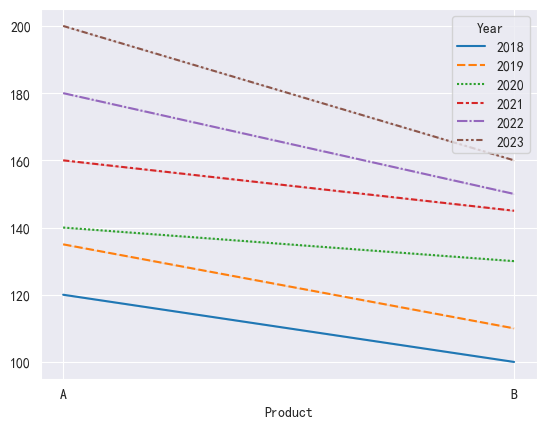

In [13]:
# 多产品数据
df = pd.DataFrame({

    'Year': [2018, 2019, 2020, 2021, 2022, 2023] * 2,
    'Product': ['A'] * 6 + ['B'] * 6,
    'Sales': [120, 135, 140, 160, 180, 200, 100, 110, 130, 145, 150, 160]
})


sns.set_style("darkgrid")
sns.set_style({"font.sans-serif": "SimHei"})
df = df.pivot_table(index="Year", columns="Product", 
values="Sales")# 调整顺序
orders = ['A'] * 6 + ['B'] * 6
df = df[orders]
df = df.T

sns.lineplot(data=df)
# 显示
plt.show()

In [ ]:
sns.lineplot(
    data=None,
    x=None,
    y=None,
    hue=None,
    size=None,
    style=None,
    units=None,
    weights=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    sizes=None,
    size_order=None,
    size_norm=None,
    dashes=True,
    markers=None,
    style_order=None,
    estimator="mean",
    errorbar=("ci", 95),
    n_boot=1000,
    seed=None,
    orient="x",
    sort=True,
    err_style="band",
    err_kws=None,
    legend="auto",
    ci="deprecated",
    ax=None,
    **kwargs,
)


使用参数 col 与参数 row 可以通过将图形分为不同的子图进行展示。

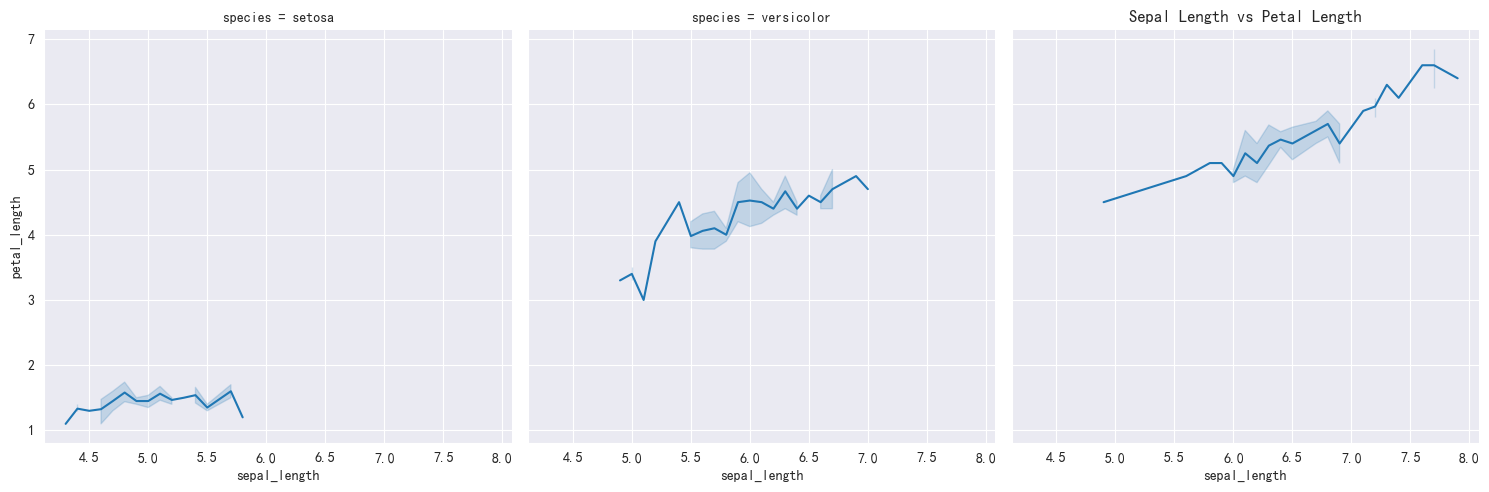

In [21]:
# 比如研究不同种类的萼片长度与花瓣长度之间的关系。

sns.relplot(data=iris, x=iris['sepal_length'], y=iris['petal_length'], col='species', kind='line')
plt.title("Sepal Length vs Petal Length")
plt.show()

In [ ]:
# 比如研究不同种类的萼片长度与花瓣长度之间的关系。

sns.relplot(data=iris, x=iris['sepal_length'], y=iris['petal_length'], row='species', kind='line')
plt.title("Sepal Length vs Petal Length")
plt.show()

还可以将 row 与 col 结合使用，创建一个网格状的子图。

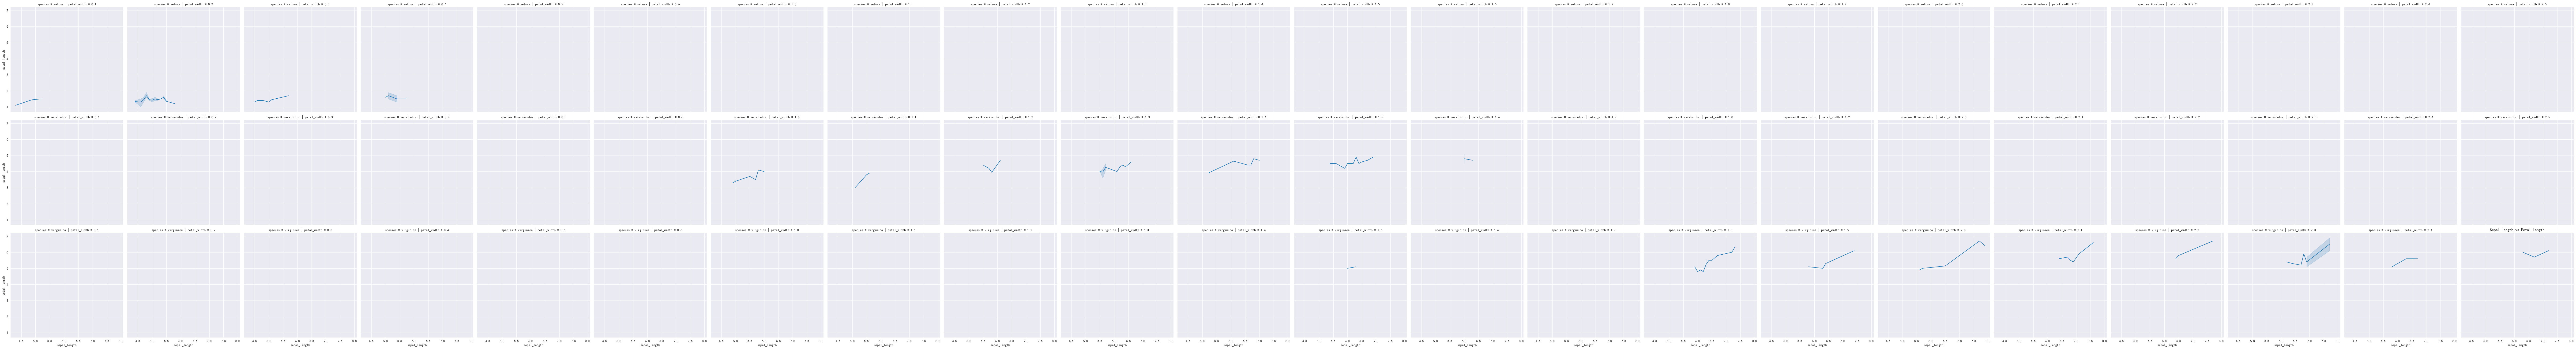

In [23]:

sns.relplot(data=iris, x=iris['sepal_length'], y=iris['petal_length'], row='species', col='petal_width', kind='line')
plt.title("Sepal Length vs Petal Length")
plt.show()

接下来绘制一下花瓣长度和萼片长度的线性回归图，看看二者之间是否存在线性关系。

对于不同种类的鸢尾花，可以将其分布在不同的子图中

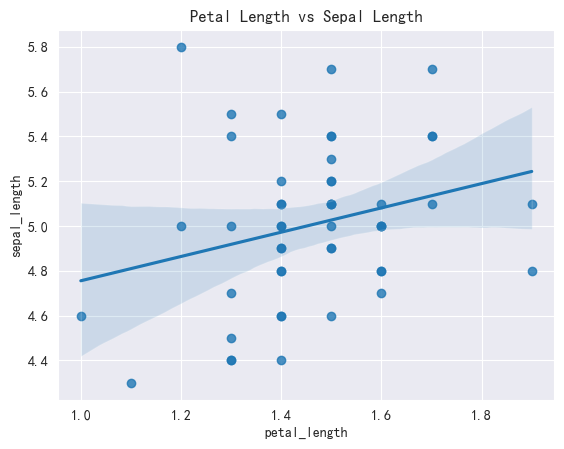

In [29]:
sns.regplot(data=iris[iris['species'] == 'setosa'], x='petal_length', y='sepal_length', fit_reg=True)


plt.title("Petal Length vs Sepal Length")
plt.show()

注意 regplot 并不支持分组回归，也就是说我们并不能使用一个图中的不同颜色表示不同的类别。

如果需要按照类别分组绘制回归线，应该使用另外一个函数  lmplot。该函数在保留了 regplot 的功能之外，还支持了分组回归的功能。

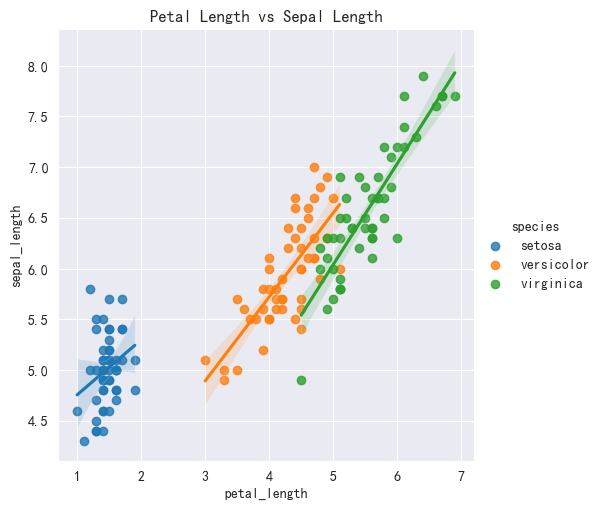

In [30]:
sns.lmplot(data=iris, x='petal_length', y='sepal_length', hue='species')


plt.title("Petal Length vs Sepal Length")
plt.show()

绘制花瓣长度的直方图

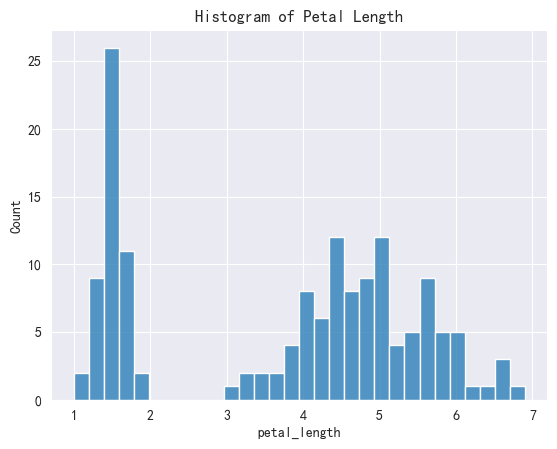

In [14]:
# 绘制花瓣长度的直方图
sns.histplot(data=iris, x="petal_length", bins=30, kde=False)
plt.title('Histogram of Petal Length')
plt.show()

绘制花瓣长度的核密度估计图

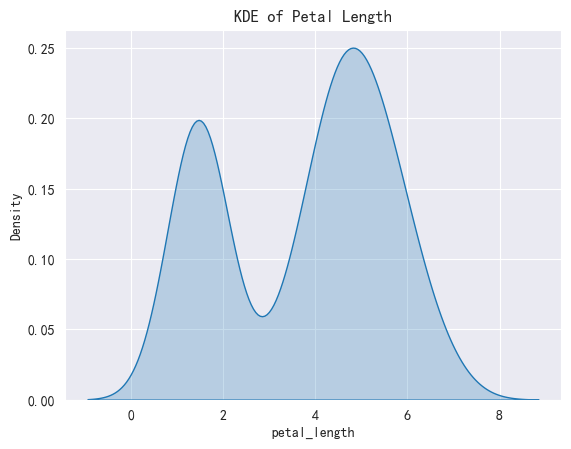

In [15]:
# 绘制花瓣长度的核密度估计图
sns.kdeplot(data=iris, x="petal_length", fill=True)
plt.title('KDE of Petal Length')
plt.show()

绘制鸢尾花数据集的成对关系图，展示不同特征之间的关系

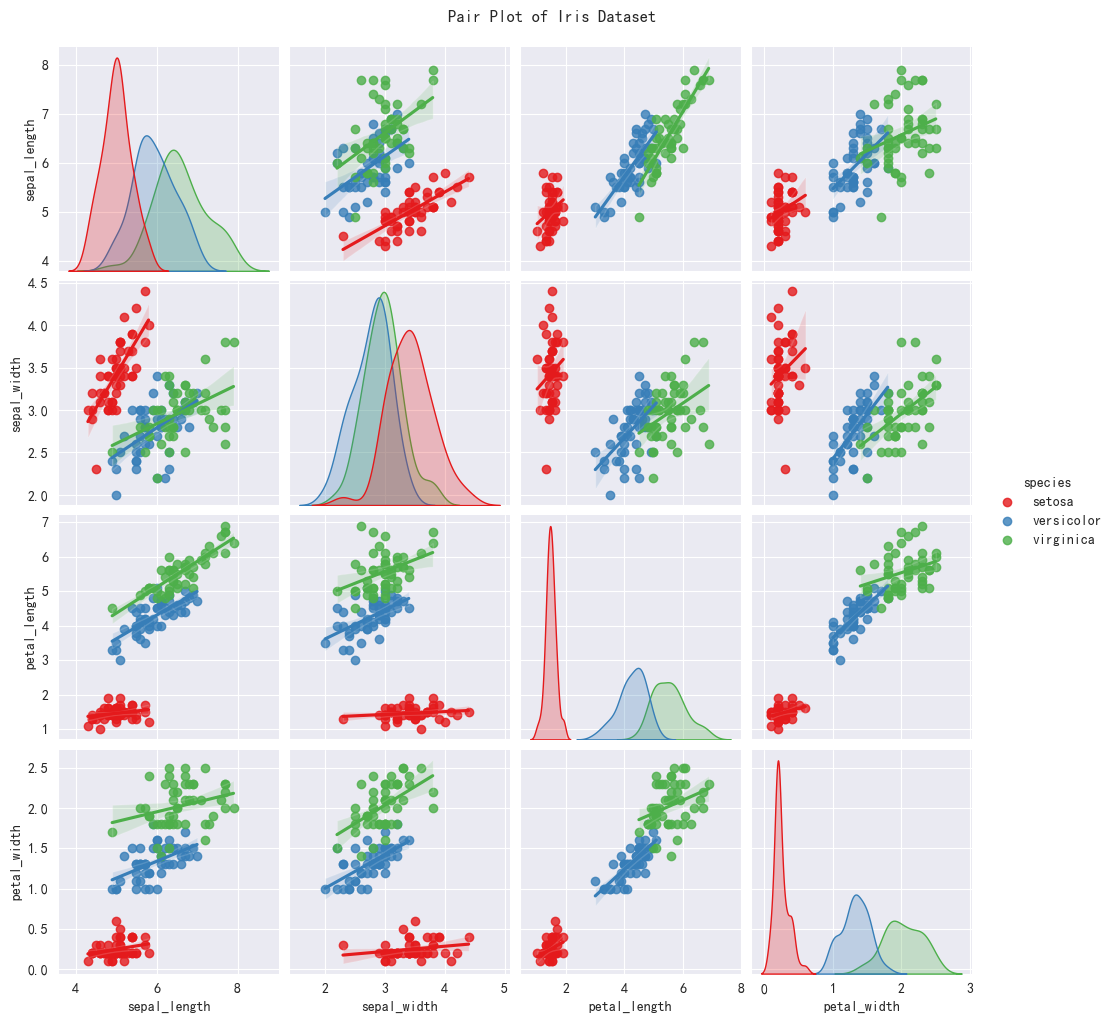

In [31]:
# 加载鸢尾花数据
iris = sns.load_dataset("iris")

sns.pairplot(
    data=iris,
    hue="species",           # 按物种着色
    palette="Set1",          # 颜色方案
    diag_kind="kde",         # 对角线画 KDE 分布
    kind="reg"               # 非对角线加回归线
)
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()


热力图可以通过**视觉编码**将复杂的数值关系转化为**直观的颜色模式，** 因此一般用作**相关性分析**或者**探究分布情况。**

还是使用鸢尾花数据集，分析各个参数之间的**相关系数**：

`corr` 计算相关系数，`heatmap` 直观展示相关程度

sns.heatmap(
    data,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt=".2g",
    annot_kws=None,
    linewidths=0,
    linecolor="white",
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels="auto",
    yticklabels="auto",
    mask=None,
    ax=None,
    **kwargs,
)

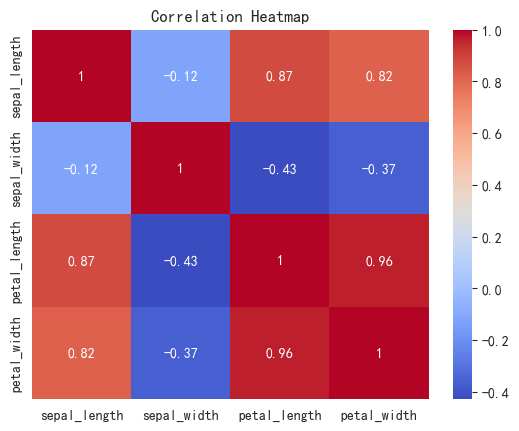

In [34]:
# 提取数值列
numeric_data = iris.select_dtypes(include="number")

corr_matrix = numeric_data.corr()

sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")


plt.title("Correlation Heatmap")
plt.show()


研究一下不同鸢尾花品种（species） 在四个特征上的平均表现，也就是品种和特征之间的关系。构造一个“类别-特征”均值矩阵

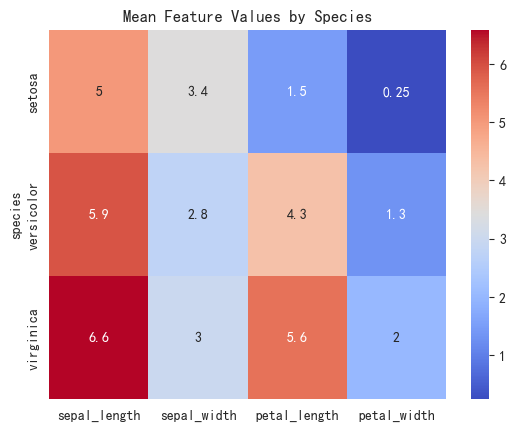

In [35]:
mean_by_species = iris.groupby("species").mean().select_dtypes('number')



sns.heatmap(data=mean_by_species, annot=True, cmap="coolwarm")

plt.title("Mean Feature Values by Species")
plt.show()

In [ ]:
sns.pairplot(
    iris,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind="scatter",
    diag_kind="auto",
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)

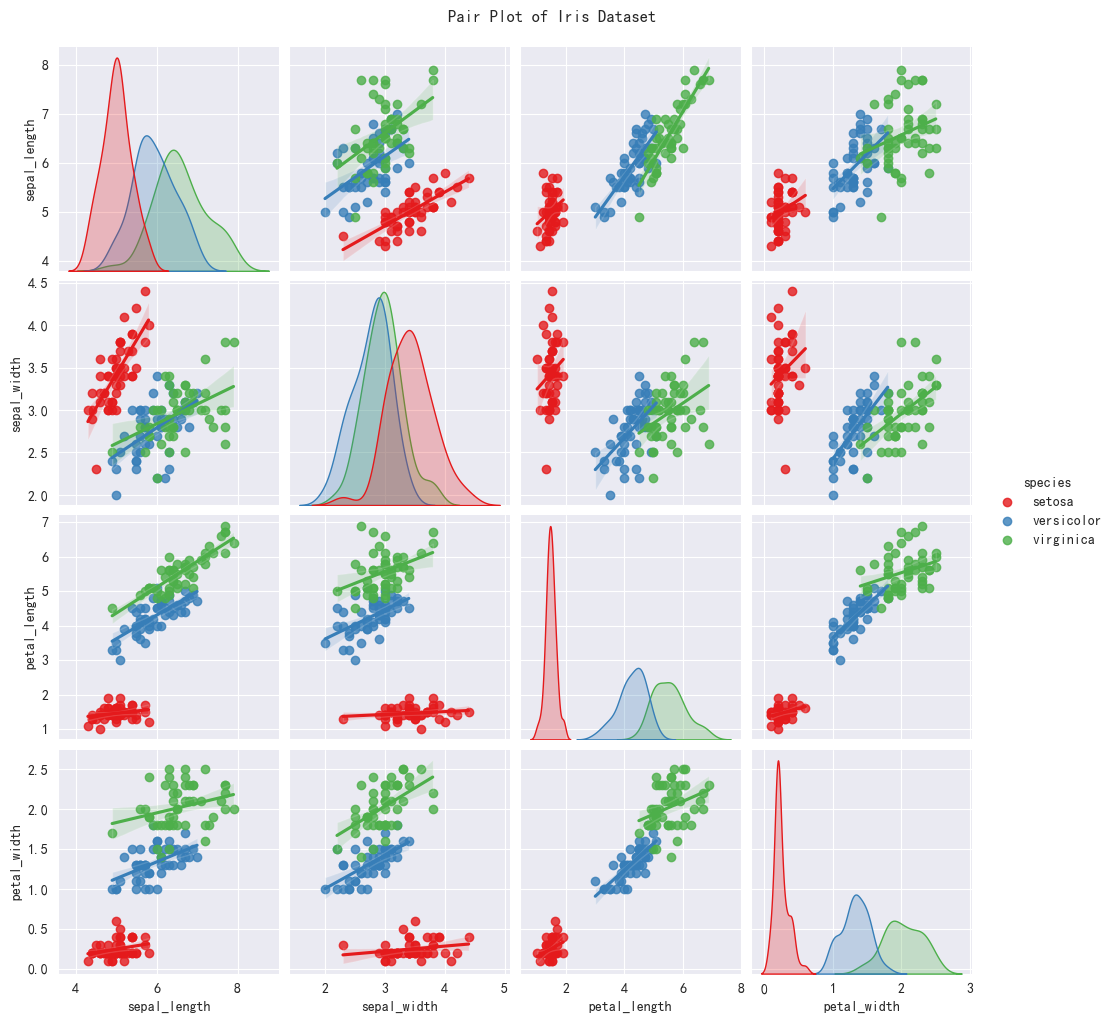

In [40]:

sns.pairplot(
    data=iris,
    hue="species",           # 按物种着色
    palette="Set1",          # 颜色方案
    diag_kind="kde",         # 对角线画 KDE 分布
    kind="reg"               # 非对角线加回归线
)
plt.suptitle("Pair Plot of Iris Dataset", y=1.02)
plt.show()

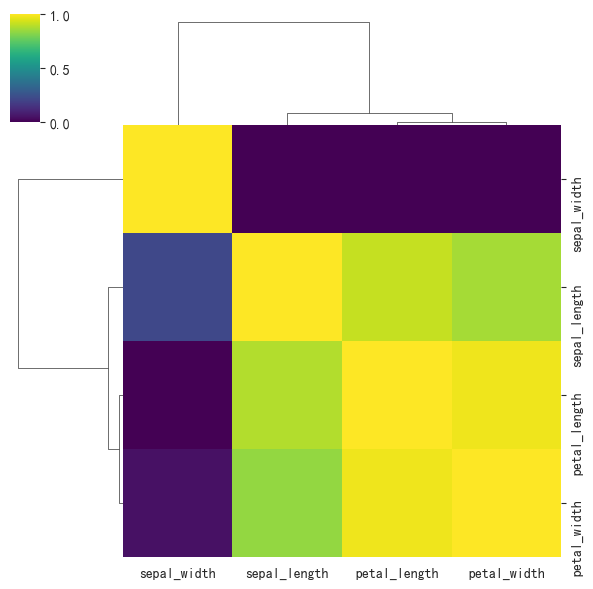

In [41]:
# 使用鸢尾花数据（数值部分）
data = iris.select_dtypes(include='number').corr()

sns.clustermap(
    data,
    cmap='viridis',
    standard_scale=1,      # 按列标准化
    method='ward',         # 聚类方法
    metric='euclidean',    # 距离度量
    figsize=(6, 6)
)
plt.show()

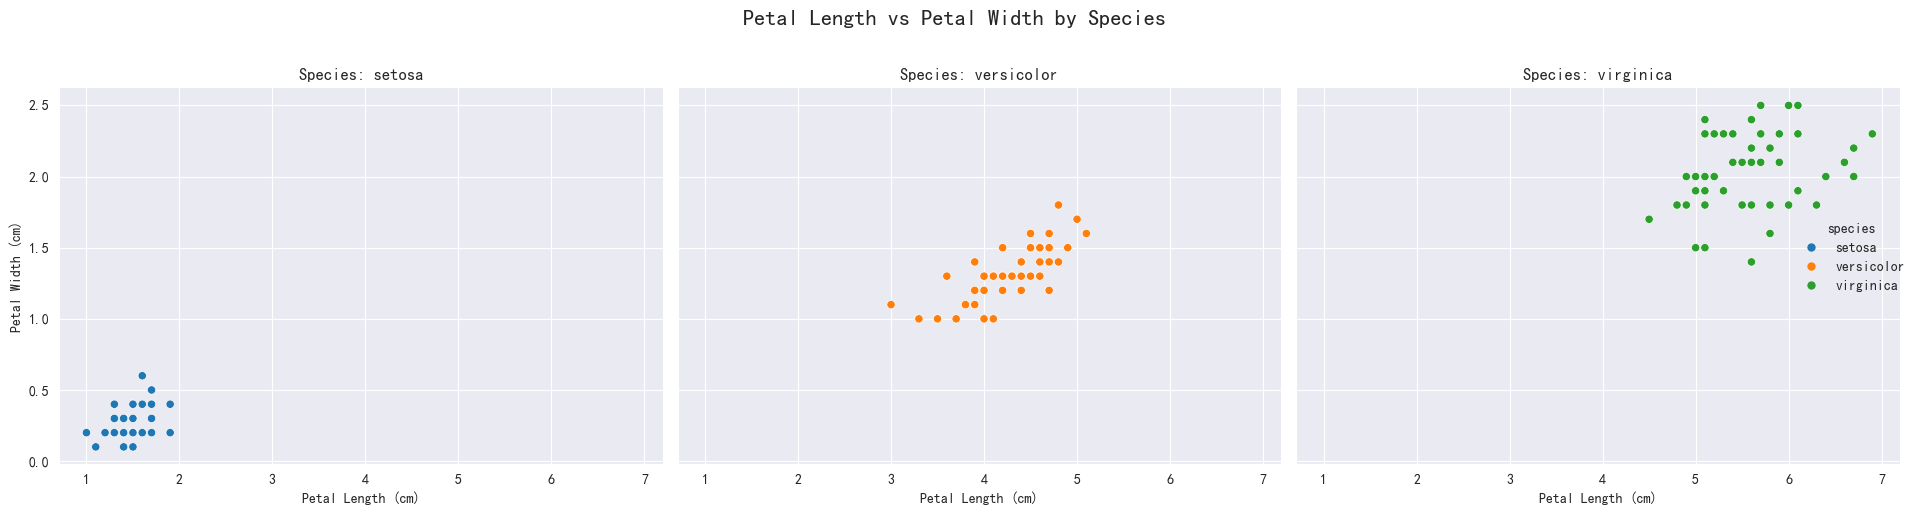

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")

# 使用 relplot（返回 FacetGrid）
g = sns.relplot(
    data=iris,
    x="petal_length",
    y="petal_width",
    hue="species",
    kind="scatter",
    height=5,
    aspect=1.2,
    col="species"  # 分列显示每个 species
)

g.set_axis_labels("Petal Length (cm)", "Petal Width (cm)")

# 2. 设置总标题（整个图形的标题）
g.fig.suptitle("Petal Length vs Petal Width by Species", fontsize=16, fontweight='bold', y=1.02)

# 3. 如果想给每个子图加标题，可以通过 g.axes.flat 遍历
species_names = iris['species'].unique()
for ax, name in zip(g.axes.flat, species_names):
    ax.set_title(f"Species: {name}", fontsize=12)

# 4. 调整布局，防止标题重叠
plt.tight_layout()
plt.show()